# Retificador de meia onda (Carga D/R/L)

<center>
<img width="350" height="500" src="Figuras/05_meia_onda_drl.png">
</center>

In [2]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 31.830988618379063 
Vrms: 	 50.000000000000014
# - Corrente na carga - # 
Ipk: 	 0.8246190095435688 
Im: 	 0.3174016850105964 
Irms: 	 0.4330645651396021
# - Corrente no diodo - # 
Idpk: 	 0.48409966305801394 
Idm: 	 0.05767085901950227 
Idrms: 	 0.1195596340689549
# - Potências - # 
Ppk:	 75.62170175110892 
P: 	 18.754835436859842 
S: 	 29.43216025717869
# - Fatores - # 
FP:	 0.6372225236944821 
THD V:	 1.0000010759923332 
THD I:	 1.1625566292649838


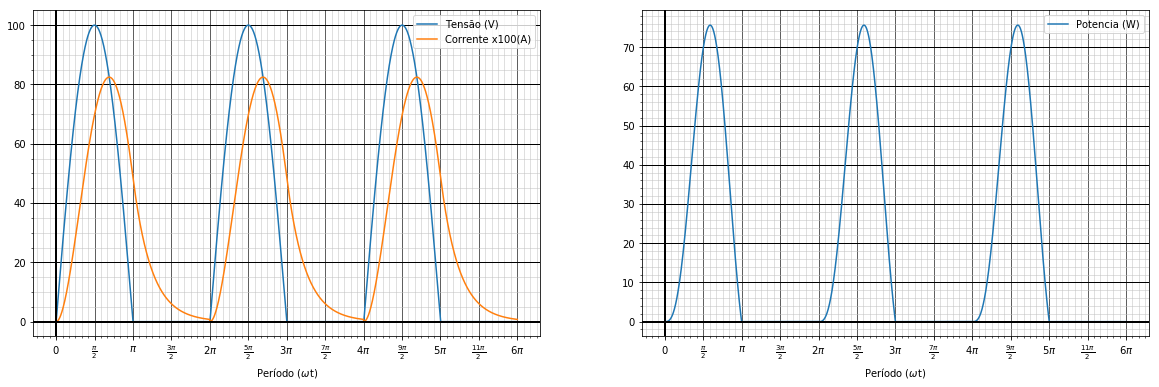

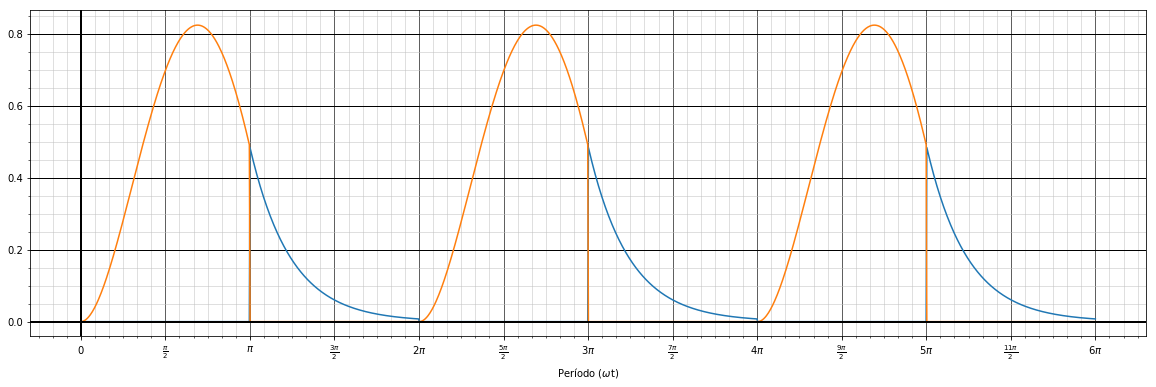

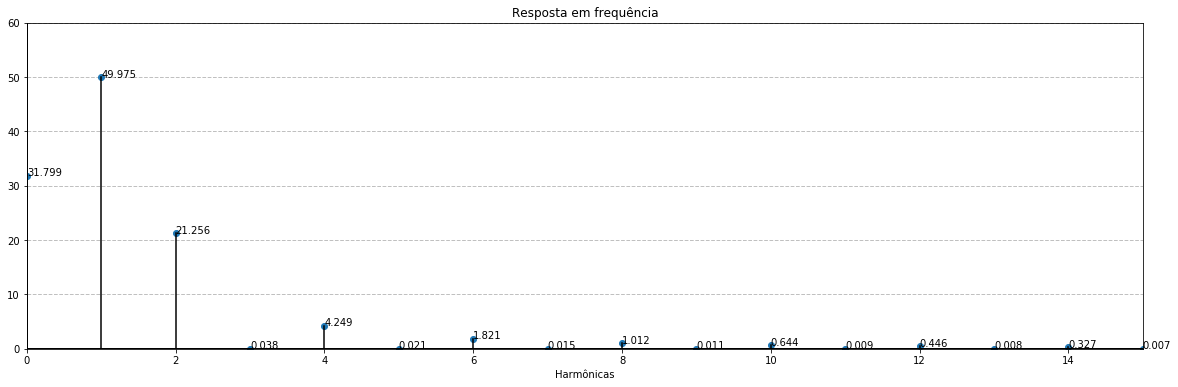

In [6]:
############# RETIFICADOR MEIA ONDA #############
################## CARGA D/R/L ##################

V_pk = 100
Freq = 60
R = 100
L = 0.2
T = 2*pi
a = 0
b = pi

w = 2*pi*Freq

XL = w * L

XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL) #(r, phi) = polar(z)
tal = L/R

# Vpk*sen(x)
func_v = f'{V_pk}*sin(x)*{degrau(a,b)}'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

# (Vpk/Z)*[sen(x - teta) + sen(teta)*exp(-x/(w*tal))]
func_id1 = f'({V_pk}/{Z})*(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))*{degrau(a,b)}'
Id1_media = calculo_medio(func_id1)
Id1_rms = calculo_rms(func_id1)
Id1_pk = calculo_pk(func_id1)

# val_in*exp(-(x-b)/(w*tal))
val_in = sym.sympify(f'({V_pk}/{Z})*(sin({b} - {teta}) + sin({teta})*exp(-{b}/({w}*{tal})))')
func_id2 = f'{val_in}*exp(-(x - {b})/({w}*{tal}))*( heaviside(x - {b}, 0) + {eps} )'
Id2_media = calculo_medio(func_id2)
Id2_rms = calculo_rms(func_id2)
Id2_pk = calculo_pk(func_id2)

func_i = '(' + func_id1 + ')+(' + func_id2 + ')'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = Id1_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk , "\nVm: \t"  , V_media , "\nVrms: \t" , V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk , "\nIm: \t"  , I_media , "\nIrms: \t" , I_rms)
print("# - Corrente no diodo - #" , "\nIdpk: \t", Id2_pk, "\nIdm: \t" , Id2_media, "\nIdrms: \t", Id2_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk , "\nP: \t"   , P       , "\nS: \t"    , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP   , "\nTHD V:\t", thdV    , "\nTHD I:\t" , thdI)

plot_info(func_v, func_i, xlim=(0, T))

fig, ax1 = plt.subplots(1, 1, figsize=(20, 6), sharey=False, sharex=True)
plot_fx(func_id2, "Corrente no diodo", xlim=(0, T), ax=ax1)
plot_fx(func_id1, "Corrente no diodo", xlim=(0, T), ax=ax1)

fig, ax2 = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)